In [25]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import seaborn
import seaborn as sns

# Dependencies and Setup
import json
import pandas as pd
import hvplot.pandas
import time
import numpy as np


import matplotlib.pyplot as plt

In [26]:
# Read in dataset
titles_df = pd.read_csv("titles_updated.csv")
titles_df

,Title,type,country,date_added,release_year,rating,description,IMDb,Genre
0,3%,TV Show,Brazil,2020-08-14,2020,TV-MA,In a future where the elite inhabit an island ...,7.4,Drama
1,7:19,Movie,Mexico,2016-12-23,2016,TV-MA,After a devastating earthquake hits Mexico Cit...,6.0,Drama
2,23:59,Movie,Singapore,2018-12-20,2011,R,"When an army recruit is found dead, his fellow...",4.7,Horror
3,9,Movie,United States,2017-11-16,2009,PG-13,"In a postapocalyptic world, rag-doll robots hi...",7.1,Action & Adventure
4,21,Movie,United States,2020-01-01,2008,PG-13,A brilliant group of students become card-coun...,6.8,Drama
...,...,...,...,...,...,...,...,...,...
3886,Zona Rosa,TV Show,Mexico,2019-11-26,2019,TV-MA,An assortment of talent takes the stage for a ...,5.8,Comedy
3887,Zoo,Movie,India,2018-07-01,2018,TV-MA,A drug dealer starts having doubts about his t...,6.8,Drama
3888,Zoom,Movie,United States,2020-01-11,2006,PG,"Dragged from civilian life, a former superhero...",4.4,Comedy
3889,Zubaan,Movie,India,2019-03-02,2015,TV-14,A scrappy but poor boy worms his way into a ty...,6.1,Drama


In [27]:
# Show datatypes
titles_df.dtypes

Title            object
type             object
country          object
date_added       object
release_year      int64
rating           object
description      object
IMDb            float64
Genre            object
dtype: object

In [28]:
# Show complete dataframe
#pd.set_option("display.max_rows", 9999)

In [29]:
# Show shape of dataframe
titles_df.shape

(3891, 9)

In [30]:
# Show unique values
titles_df["country"].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'India', 'Poland', 'Thailand', 'Norway', 'Canada', 'Romania',
       'Spain', 'France', 'Portugal', 'United Kingdom', 'Hong Kong',
       'Italy', 'South Korea', 'South Africa', 'Indonesia', 'Denmark',
       'Japan', 'New Zealand', 'Australia', 'Nigeria', 'China',
       'Netherlands', 'Germany', 'Argentina', 'Philippines',
       'United Arab Emirates', 'Taiwan', 'Israel', 'Pakistan', 'Bulgaria',
       'Mauritius', 'Colombia', 'Uruguay', 'Soviet Union', 'Sweden',
       'Egypt', 'Iceland', 'Ireland', 'Chile', 'Ghana', 'Saudi Arabia',
       'Belgium', 'Russia', 'Finland', 'Malaysia', 'Hungary', 'Venezuela',
       'Czech Republic', 'Cambodia', 'Austria', 'Vietnam', 'Kenya',
       'Slovenia', 'Peru', 'Kuwait', 'Serbia', 'Bangladesh', 'Georgia',
       'Switzerland', 'Puerto Rico', 'Lebanon', 'Ukraine', 'Jamaica',
       'Cyprus', 'Greece', 'Croatia'], dtype=object)

In [31]:
# Summary Statistics on IMDb ratings
titles_df['IMDb'].describe() 


count    3891.000000
mean        6.541712
std         1.198545
min         1.400000
25%         5.800000
50%         6.600000
75%         7.400000
max         9.500000
Name: IMDb, dtype: float64

In [32]:
# Create the Movies and TV Shows DataFrames.
movies_df = titles_df[titles_df["type"] == "Movie"]
tv_shows_df = titles_df[titles_df["type"] == "TV Show"]

In [33]:
# Filter Movies dataframe
movies_imdb = movies_df.groupby(["Genre"]).mean()["IMDb"]
movies_imdb

Genre
Action & Adventure    5.918713
Anime                 7.450000
Children              6.043421
Comedy                6.122006
Documentaries         6.906452
Drama                 6.389282
Horror                5.344242
Musicals              7.375000
Romance               5.921429
Sci-Fi & Fantasy      5.735000
Thrillers             5.805882
Name: IMDb, dtype: float64

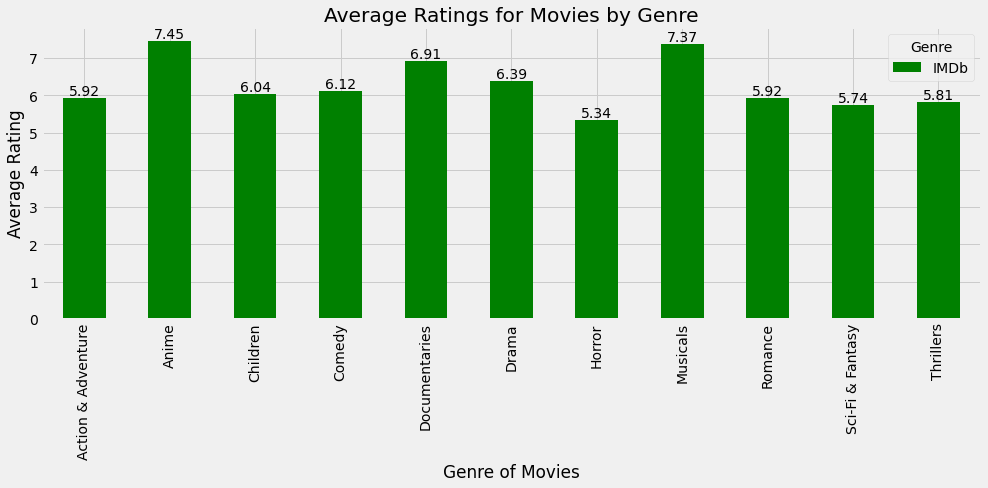

In [34]:
# Create bar graph for Movie ratings by genre
from matplotlib import style
style.use('fivethirtyeight')
movies_imdb.plot.bar(figsize=(15,5), title="Average Ratings for Movies by Genre", color = 'g')
plt.legend(loc="best", title='Genre')
plt.ylabel("Average Rating")
plt.xlabel("Genre of Movies")
for i in range(len(movies_imdb)):
    plt.text(i, round(movies_imdb[i], 2), round(movies_imdb[i], 2), ha='center', va="bottom")
# Save Figure
plt.savefig("visualizations/movie_rating_by_genre.png")
plt.show()

In [35]:
# Check TV shows dataframe
tv_shows_df.head()

,Title,type,country,date_added,release_year,rating,description,IMDb,Genre
0,3%,TV Show,Brazil,2020-08-14,2020,TV-MA,In a future where the elite inhabit an island ...,7.4,Drama
5,46,TV Show,Turkey,2017-07-01,2016,TV-MA,A genetics professor experiments with a treatm...,8.5,Drama
9,1983,TV Show,Poland,2018-11-30,2018,TV-MA,"In this dark alt-history thriller, a naïve law...",6.8,Crime
10,1994,TV Show,Mexico,2019-05-17,2019,TV-MA,Archival video and new interviews examine Mexi...,8.0,Crime
16,#blackAF,TV Show,United States,2020-04-17,2020,TV-MA,Kenya Barris and his family navigate relations...,6.6,Comedy


In [36]:
# Filter TV shows dataframe
tv_shows_imdb = tv_shows_df.groupby(["Genre"]).mean()["IMDb"]
tv_shows_imdb

Genre
Action & Adventure    7.574074
Anime                 7.674419
Children              6.765138
Comedy                7.055363
Crime                 7.410385
Documentaries         7.416379
Drama                 7.258929
Horror                6.985000
Mystery               8.650000
Reality               6.484416
Romance               7.473171
Sci-Fi & Fantasy      7.500000
Teen                  7.183333
Thrillers             7.350000
Name: IMDb, dtype: float64

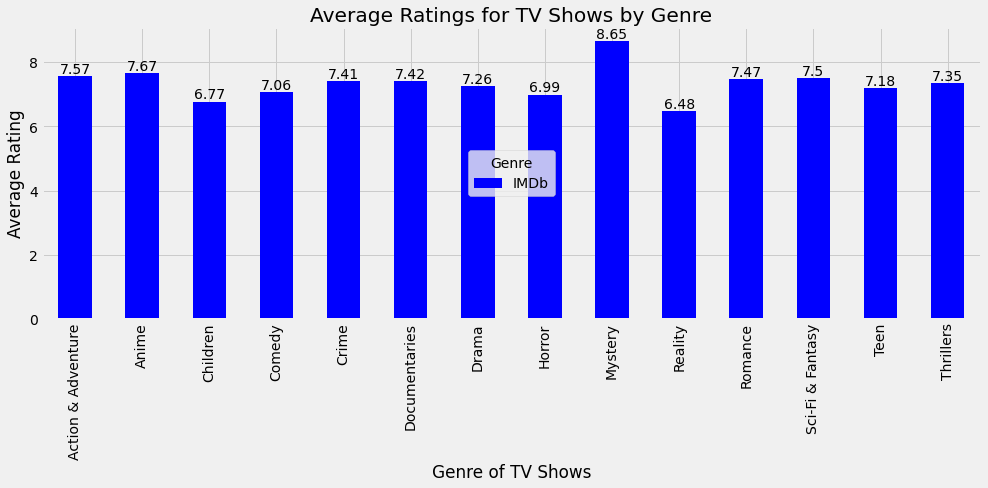

In [37]:
# Create bar graph for Movie ratings by genre
from matplotlib import style
style.use('fivethirtyeight')
tv_shows_imdb.plot.bar(figsize=(15,5), title="Average Ratings for TV Shows by Genre", color = 'b')
plt.legend(loc="center", title='Genre')
plt.ylabel("Average Rating")
plt.xlabel("Genre of TV Shows")
for i in range(len(tv_shows_imdb)):
    plt.text(i, round(tv_shows_imdb[i], 2), round(tv_shows_imdb[i], 2), ha='center', va="bottom")
# Save Figure
plt.savefig("visualizations/tv_show_rating_by_genre.png")
plt.show()

In [38]:
# Generate average values by Genre
ratings_imdb = titles_df.groupby(["Genre"]).mean()["IMDb"]
ratings_imdb

Genre
Action & Adventure    6.144444
Anime                 7.664444
Children              6.468649
Comedy                6.343832
Crime                 7.410385
Documentaries         7.027664
Drama                 6.570829
Horror                5.521622
Musicals              7.375000
Mystery               8.650000
Reality               6.484416
Romance               7.078182
Sci-Fi & Fantasy      5.819048
Teen                  7.183333
Thrillers             5.850000
Name: IMDb, dtype: float64

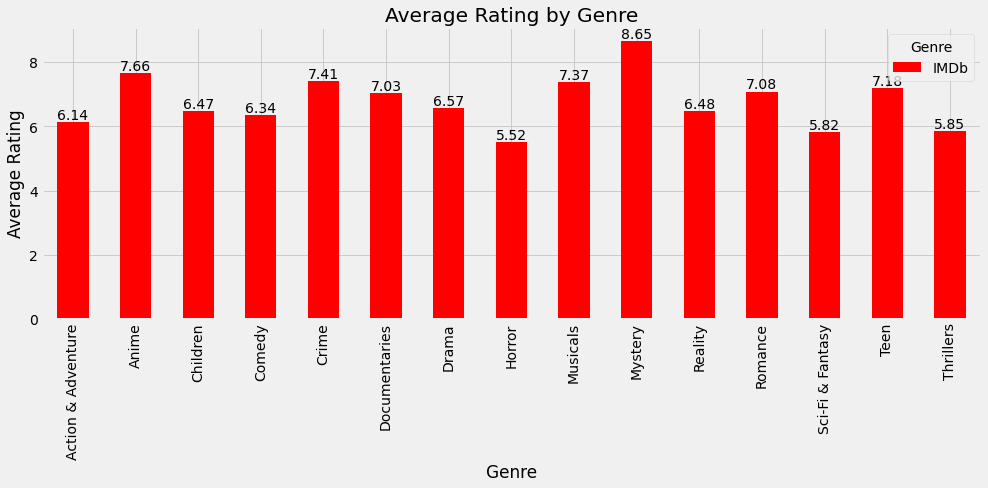

In [39]:
# Create bar graph for average rating per Genre
from matplotlib import style
style.use('fivethirtyeight')
ratings_imdb.plot.bar(figsize=(15,5), title="Average Rating by Genre", color = 'r')
plt.legend(loc="best", title='Genre')
plt.ylabel("Average Rating")
plt.xlabel("Genre")
for i in range(len(ratings_imdb)):
    plt.text(i, round(ratings_imdb[i], 2), round(ratings_imdb[i], 2), ha='center', va="bottom")
# Save Figure
plt.savefig("visualizations/average_rating_by_genre.png")
plt.show()

In [40]:
# Number of values per type
per_type_counts = titles_df["type"].value_counts()
per_type_counts

Movie      2668
TV Show    1223
Name: type, dtype: int64

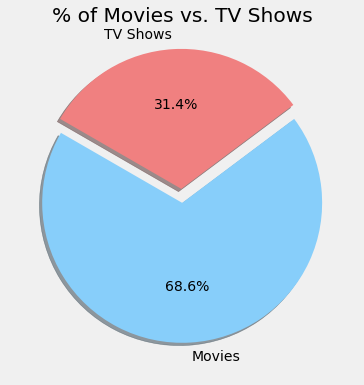

In [41]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(per_type_counts,
    labels=["Movies", "TV Shows"],
    colors=["lightskyblue", "lightcoral"],
    explode=[0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Movies vs. TV Shows")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("visualizations/percentage_movies_shows.png")
# Show Figure
plt.show()

In [42]:
# Show complete dataframe
#pd.set_option("display.max_rows", 9999)

In [43]:
# Final dataframe
titles_df

,Title,type,country,date_added,release_year,rating,description,IMDb,Genre
0,3%,TV Show,Brazil,2020-08-14,2020,TV-MA,In a future where the elite inhabit an island ...,7.4,Drama
1,7:19,Movie,Mexico,2016-12-23,2016,TV-MA,After a devastating earthquake hits Mexico Cit...,6.0,Drama
2,23:59,Movie,Singapore,2018-12-20,2011,R,"When an army recruit is found dead, his fellow...",4.7,Horror
3,9,Movie,United States,2017-11-16,2009,PG-13,"In a postapocalyptic world, rag-doll robots hi...",7.1,Action & Adventure
4,21,Movie,United States,2020-01-01,2008,PG-13,A brilliant group of students become card-coun...,6.8,Drama
...,...,...,...,...,...,...,...,...,...
3886,Zona Rosa,TV Show,Mexico,2019-11-26,2019,TV-MA,An assortment of talent takes the stage for a ...,5.8,Comedy
3887,Zoo,Movie,India,2018-07-01,2018,TV-MA,A drug dealer starts having doubts about his t...,6.8,Drama
3888,Zoom,Movie,United States,2020-01-11,2006,PG,"Dragged from civilian life, a former superhero...",4.4,Comedy
3889,Zubaan,Movie,India,2019-03-02,2015,TV-14,A scrappy but poor boy worms his way into a ty...,6.1,Drama


In [44]:
# Convert 'date_added' column to datetime in order to access only the year 
titles_df['date_added_to_netflix'] = pd.to_datetime(titles_df['date_added'])

In [45]:
# Check dataframe
titles_df

,Title,type,country,date_added,release_year,rating,description,IMDb,Genre,date_added_to_netflix
0,3%,TV Show,Brazil,2020-08-14,2020,TV-MA,In a future where the elite inhabit an island ...,7.4,Drama,2020-08-14
1,7:19,Movie,Mexico,2016-12-23,2016,TV-MA,After a devastating earthquake hits Mexico Cit...,6.0,Drama,2016-12-23
2,23:59,Movie,Singapore,2018-12-20,2011,R,"When an army recruit is found dead, his fellow...",4.7,Horror,2018-12-20
3,9,Movie,United States,2017-11-16,2009,PG-13,"In a postapocalyptic world, rag-doll robots hi...",7.1,Action & Adventure,2017-11-16
4,21,Movie,United States,2020-01-01,2008,PG-13,A brilliant group of students become card-coun...,6.8,Drama,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
3886,Zona Rosa,TV Show,Mexico,2019-11-26,2019,TV-MA,An assortment of talent takes the stage for a ...,5.8,Comedy,2019-11-26
3887,Zoo,Movie,India,2018-07-01,2018,TV-MA,A drug dealer starts having doubts about his t...,6.8,Drama,2018-07-01
3888,Zoom,Movie,United States,2020-01-11,2006,PG,"Dragged from civilian life, a former superhero...",4.4,Comedy,2020-01-11
3889,Zubaan,Movie,India,2019-03-02,2015,TV-14,A scrappy but poor boy worms his way into a ty...,6.1,Drama,2019-03-02


In [46]:
# Access only year
titles_df['year_added_to_netflix'] = titles_df['date_added_to_netflix'].dt.year

In [47]:
# Check dataframe to ensure change occurred
titles_df = titles_df.drop(['date_added_to_netflix'], axis = 'columns')
titles_df.head(10)

,Title,type,country,date_added,release_year,rating,description,IMDb,Genre,year_added_to_netflix
0,3%,TV Show,Brazil,2020-08-14,2020,TV-MA,In a future where the elite inhabit an island ...,7.4,Drama,2020
1,7:19,Movie,Mexico,2016-12-23,2016,TV-MA,After a devastating earthquake hits Mexico Cit...,6.0,Drama,2016
2,23:59,Movie,Singapore,2018-12-20,2011,R,"When an army recruit is found dead, his fellow...",4.7,Horror,2018
3,9,Movie,United States,2017-11-16,2009,PG-13,"In a postapocalyptic world, rag-doll robots hi...",7.1,Action & Adventure,2017
4,21,Movie,United States,2020-01-01,2008,PG-13,A brilliant group of students become card-coun...,6.8,Drama,2020
5,46,TV Show,Turkey,2017-07-01,2016,TV-MA,A genetics professor experiments with a treatm...,8.5,Drama,2017
6,706,Movie,India,2019-04-01,2019,TV-14,"When a doctor goes missing, his psychiatrist w...",5.3,Horror,2019
7,1920,Movie,India,2017-12-15,2008,TV-MA,An architect and his wife move into a castle t...,6.4,Horror,2017
8,1922,Movie,United States,2017-10-20,2017,TV-MA,A farmer pens a confession admitting to his wi...,6.3,Drama,2017
9,1983,TV Show,Poland,2018-11-30,2018,TV-MA,"In this dark alt-history thriller, a naïve law...",6.8,Crime,2018


In [48]:
# Filter dataframe
release_year = titles_df.groupby(["release_year"]).count()["Title"]
release_year

release_year
1942      1
1943      1
1944      2
1945      3
1946      1
       ... 
2017    576
2018    667
2019    577
2020    282
2021      5
Name: Title, Length: 63, dtype: int64